In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [25]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [27]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [29]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [30]:
print(trainData)

[[0.40001392]
 [0.40665027]
 [0.38520976]
 ...
 [0.68184982]
 [0.67660572]
 [0.65115092]]


In [31]:
X_train = []
y_train = []

timestep = 60
length = len(trainData)

for i in range (timestep,length): 
    X_train.append(trainData[i-timestep:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

# X_train uses max-pooling by grouping 30 datapoints together and mapping that vector/array of datapoints to the very next datapoint that follows the last datapoint of the vector
# That very next datapoint for each X_train vector is stored in y_train
print(X_train)
print(y_train)

[[0.40001392 0.40665027 0.38520976 ... 0.36279469 0.35745777 0.37766846]
 [0.40665027 0.38520976 0.36439577 ... 0.35745777 0.37766846 0.36065992]
 [0.38520976 0.36439577 0.30063115 ... 0.37766846 0.36065992 0.34406906]
 ...
 [0.65286802 0.66184797 0.66194078 ... 0.69625951 0.69312697 0.69693243]
 [0.66184797 0.66194078 0.66284574 ... 0.69312697 0.69693243 0.68184982]
 [0.66194078 0.66284574 0.65871543 ... 0.69693243 0.68184982 0.67660572]]
[0.36065992 0.34406906 0.35722573 ... 0.68184982 0.67660572 0.65115092]


In [32]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # reshaping the training vector since LSTM model works on 3D vectors
print(X_train)
X_train.shape # shape will be (sequence_length, timestep, batch_size). Here length of sequence = 1089, timestep = 60 and batch_size is 1.

[[[0.40001392]
  [0.40665027]
  [0.38520976]
  ...
  [0.36279469]
  [0.35745777]
  [0.37766846]]

 [[0.40665027]
  [0.38520976]
  [0.36439577]
  ...
  [0.35745777]
  [0.37766846]
  [0.36065992]]

 [[0.38520976]
  [0.36439577]
  [0.30063115]
  ...
  [0.37766846]
  [0.36065992]
  [0.34406906]]

 ...

 [[0.65286802]
  [0.66184797]
  [0.66194078]
  ...
  [0.69625951]
  [0.69312697]
  [0.69693243]]

 [[0.66184797]
  [0.66194078]
  [0.66284574]
  ...
  [0.69312697]
  [0.69693243]
  [0.68184982]]

 [[0.66194078]
  [0.66284574]
  [0.65871543]
  ...
  [0.69693243]
  [0.68184982]
  [0.67660572]]]


(1089, 60, 1)

In [33]:
# A dense layer is a classic fully connected neural network layer : each input node is connected to each output node
# A dropout layer is similar except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting.

model = Sequential() # our model works on a time sequence hence sequential type used

# RNNs consist of 4 layers where LSTM network will be required, we add those 4 layers followed by a Dropout layer
model.add(LSTM(units=150, return_sequences = True, input_shape =(X_train.shape[1],1))) # input size should be (timestep, batch_size)

model.add(LSTM(units=150, return_sequences = True))

model.add(LSTM(units=150, return_sequences = True))

model.add(LSTM(units=150, return_sequences = False))
model.add(Dropout(0.2))

# At the end of the model, we add a Dense layer
model.add(Dense(units = 1))

# We compile the model with an Adam optimizer with loss calculated using mean squared error
model.compile(optimizer='adam',loss="mean_squared_error")

In [34]:
model.save('StockPriceModel.h5')

/Users/aryasalian/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 6s - loss: 0.0530 - 6s/epoch - 173ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0108 - 4s/epoch - 113ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0110 - 4s/epoch - 117ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0081 - 4s/epoch - 121ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0095 - 4s/epoch - 118ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0066 - 4s/epoch - 124ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0096 - 4s/epoch - 121ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0059 - 4s/epoch - 122ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0052 - 4s/epoch - 121ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0053 - 4s/epoch - 123ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0053 - 4s/epoch - 124ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0053 - 4s/epoch - 120ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0045 - 4s/epoch - 118ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0042 - 4s/epoch - 119ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0055 - 4s/epoch - 121ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0044 - 5s/epoch - 135ms/step
Epoch 17/20
35/35

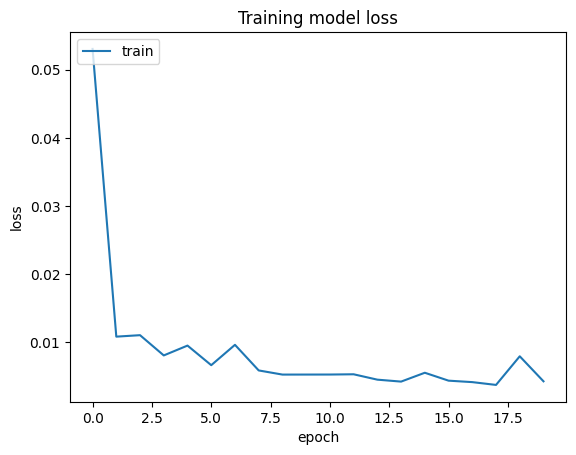

In [36]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [37]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape
print(inputClosing)

[[1235.01001 ]
 [1242.099976]
 [1214.380005]
 [1206.48999 ]
 [1200.959961]
 [1207.77002 ]
 [1201.619995]
 [1207.329956]
 [1205.380005]
 [1220.650024]
 [1241.819946]
 [1231.150024]
 [1249.300049]
 [1239.119995]
 [1218.189941]
 [1197.      ]
 [1186.47998 ]
 [1171.439941]
 [1164.829956]
 [1164.640015]
 [1177.359985]
 [1162.819946]
 [1175.329956]
 [1172.530029]
 [1156.050049]
 [1161.219971]
 [1171.089966]
 [1186.869995]
 [1166.089966]
 [1173.369995]
 [1184.650024]
 [1180.48999 ]
 [1194.640015]
 [1193.469971]
 [1195.310059]
 [1200.109985]
 [1202.949951]
 [1168.189941]
 [1157.349976]
 [1148.969971]
 [1138.819946]
 [1081.219971]
 [1079.319946]
 [1110.079956]
 [1092.25    ]
 [1121.280029]
 [1115.689941]
 [1087.969971]
 [1096.459961]
 [1101.160034]
 [1103.689941]
 [1050.709961]
 [1095.569946]
 [1071.469971]
 [1020.080017]
 [1036.209961]
 [1076.77002 ]
 [1070.      ]
 [1057.790039]
 [1040.089966]
 [1055.810059]
 [1093.390015]
 [1082.400024]
 [1066.150024]
 [1038.630005]
 [1036.050049]
 [1043.660

In [38]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 63ms/step


array([[1.3232311],
       [1.323956 ],
       [1.3348724],
       [1.3520464],
       [1.3648418],
       [1.3621278],
       [1.3459028],
       [1.3261209],
       [1.3153871],
       [1.3146919],
       [1.3090751],
       [1.2976452],
       [1.2873459],
       [1.2777857],
       [1.2762883],
       [1.2815889],
       [1.3014634],
       [1.3316673],
       [1.364794 ],
       [1.396529 ],
       [1.4063963],
       [1.3996835],
       [1.3764198],
       [1.3461716],
       [1.3214087],
       [1.3101492],
       [1.3107498],
       [1.3127636],
       [1.3051704],
       [1.2925531],
       [1.2786981],
       [1.2632904],
       [1.240556 ],
       [1.2130269],
       [1.2032961],
       [1.2155333],
       [1.2398492],
       [1.2651556],
       [1.2873882],
       [1.2959522],
       [1.3059905],
       [1.3205199],
       [1.3387245],
       [1.3559569],
       [1.3675064],
       [1.3687792],
       [1.3584208],
       [1.3505286],
       [1.3507453],
       [1.359972 ],


In [39]:
predicted_price = sc.inverse_transform(y_pred)
print(predicted_price)

[[1061.4596 ]
 [1061.7721 ]
 [1066.4766 ]
 [1073.8779 ]
 [1079.3922 ]
 [1078.2227 ]
 [1071.2302 ]
 [1062.7051 ]
 [1058.0792 ]
 [1057.7795 ]
 [1055.359  ]
 [1050.4331 ]
 [1045.9946 ]
 [1041.8745 ]
 [1041.2292 ]
 [1043.5135 ]
 [1052.0786 ]
 [1065.0953 ]
 [1079.3717 ]
 [1093.0481 ]
 [1097.3005 ]
 [1094.4076 ]
 [1084.3818 ]
 [1071.3462 ]
 [1060.6743 ]
 [1055.8219 ]
 [1056.0807 ]
 [1056.9486 ]
 [1053.6763 ]
 [1048.2386 ]
 [1042.2677 ]
 [1035.6277 ]
 [1025.8301 ]
 [1013.966  ]
 [1009.77246]
 [1015.0462 ]
 [1025.5254 ]
 [1036.4314 ]
 [1046.0128 ]
 [1049.7035 ]
 [1054.0297 ]
 [1060.2913 ]
 [1068.1367 ]
 [1075.5631 ]
 [1080.5405 ]
 [1081.0891 ]
 [1076.6251 ]
 [1073.2238 ]
 [1073.3171 ]
 [1077.2936 ]
 [1084.2748 ]
 [1088.6174 ]
 [1089.561  ]
 [1087.9486 ]
 [1087.2783 ]
 [1085.8242 ]
 [1082.2476 ]
 [1080.8015 ]
 [1085.5975 ]
 [1094.2909 ]
 [1106.1349 ]
 [1119.834  ]
 [1128.6461 ]
 [1129.0922 ]
 [1122.8881 ]
 [1113.8958 ]
 [1108.6321 ]
 [1108.081  ]
 [1110.8657 ]
 [1113.9282 ]
 [1116.493  ]
 [1117

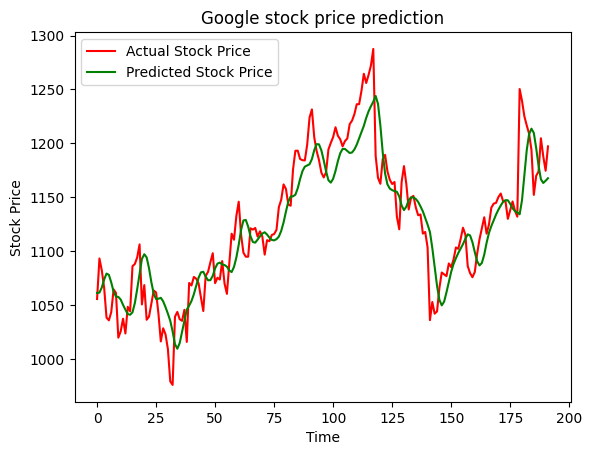

In [40]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [41]:
profit_score = 0

for i in range(1, len(y_test)):
    if((y_test[i-1] <= y_test[i] and y_test[i-1] <= predicted_price[i]) or (y_test[i-1] >= y_test[i] and y_test[i-1] >= predicted_price[i])):
        profit_score += 1
    else:
        profit_score -=1

print(profit_score)

3


Testing with recent data. Poor results reflects insufficient and inconsistent data; many datapoints are missing.

In [42]:
live_test_data = pd.read_csv('GOOG Price Predictor - Live Test - Sheet1.csv')
live_test_data["Close"] = pd.to_numeric(live_test_data.Close, errors='coerce')
live_test_data = live_test_data.iloc[:,1:2]
live_test_data = live_test_data.dropna()

live_Y = live_test_data.iloc[60:,0:].values
inputClosing = live_test_data.iloc[:].values
inputClosing_scaled = sc.transform(inputClosing)
print(inputClosing)

live_X = []
length = len(live_test_data)
timestep = 60
for i in range(timestep, length):
    live_X.append(inputClosing_scaled[i-timestep:i,0])
live_X = np.array(live_X)
live_X = np.reshape(live_X,(live_X.shape[0],live_X.shape[1],1))
live_X.shape

[[127.91]
 [122.94]
 [122.67]
 [122.87]
 [124.35]
 [124.43]
 [124.38]
 [125.79]
 [124.06]
 [123.85]
 [121.26]
 [123.87]
 [123.02]
 [119.09]
 [119.01]
 [121.08]
 [120.01]
 [120.97]
 [120.56]
 [122.63]
 [120.93]
 [120.14]
 [116.87]
 [117.71]
 [119.62]
 [124.83]
 [125.7 ]
 [125.06]
 [124.08]
 [122.78]
 [119.53]
 [120.31]
 [121.88]
 [122.79]
 [129.66]
 [129.87]
 [133.01]
 [133.11]
 [131.89]
 [128.64]
 [128.77]
 [128.54]
 [131.94]
 [131.84]
 [130.15]
 [130.21]
 [130.17]
 [131.83]
 [130.27]
 [129.11]
 [130.46]
 [128.11]
 [128.93]
 [129.69]
 [133.21]
 [130.42]
 [130.69]
 [131.79]
 [135.49]
 [136.93]
 [137.35]
 [136.8 ]
 [136.71]
 [135.37]
 [136.2 ]
 [137.2 ]
 [137.74]
 [136.07]
 [137.5 ]
 [138.99]
 [138.3 ]
 [138.96]
 [138.83]
 [134.59]
 [131.36]
 [131.25]
 [132.17]
 [129.45]
 [131.46]
 [133.13]
 [131.85]
 [135.17]
 [133.3 ]
 [136.27]
 [135.99]
 [138.73]
 [139.5 ]
 [139.2 ]
 [141.7 ]
 [140.29]
 [138.58]
 [140.49]
 [140.99]
 [139.28]
 [138.98]
 [136.74]
 [137.9 ]
 [140.12]
 [126.67]
 [123.44]


(88, 60, 1)

In [43]:
live_Y_pred = model.predict(live_X)
predicted_live_price = sc.inverse_transform(live_Y_pred)
print(predicted_live_price)

3/3 [==============================] - 1s 33ms/step
[[80.7186  ]
 [81.49265 ]
 [82.43756 ]
 [83.44519 ]
 [84.379585]
 [85.15164 ]
 [85.74995 ]
 [86.21263 ]
 [86.54967 ]
 [86.78892 ]
 [86.99866 ]
 [87.22178 ]
 [87.47978 ]
 [87.77051 ]
 [87.987   ]
 [87.95646 ]
 [87.579346]
 [86.893364]
 [85.96328 ]
 [84.91645 ]
 [83.92942 ]
 [83.11701 ]
 [82.58708 ]
 [82.35605 ]
 [82.42592 ]
 [82.76196 ]
 [83.34475 ]
 [84.14869 ]
 [85.104   ]
 [86.163826]
 [87.249695]
 [88.233055]
 [89.046364]
 [89.69027 ]
 [90.15569 ]
 [90.43221 ]
 [90.48472 ]
 [90.32952 ]
 [90.07511 ]
 [89.56006 ]
 [88.53419 ]
 [86.912704]
 [84.86112 ]
 [82.65022 ]
 [80.58183 ]
 [78.90263 ]
 [77.772736]
 [77.24887 ]
 [77.29387 ]
 [77.80636 ]
 [78.60659 ]
 [79.54911 ]
 [80.51829 ]
 [81.45903 ]
 [82.36219 ]
 [83.26846 ]
 [84.16595 ]
 [85.023056]
 [85.82077 ]
 [86.57266 ]
 [87.25258 ]
 [87.81535 ]
 [88.24333 ]
 [88.49951 ]
 [88.51148 ]
 [88.23734 ]
 [87.64939 ]
 [86.81582 ]
 [85.84548 ]
 [84.99408 ]
 [84.45295 ]
 [84.23787 ]
 [84.242905]

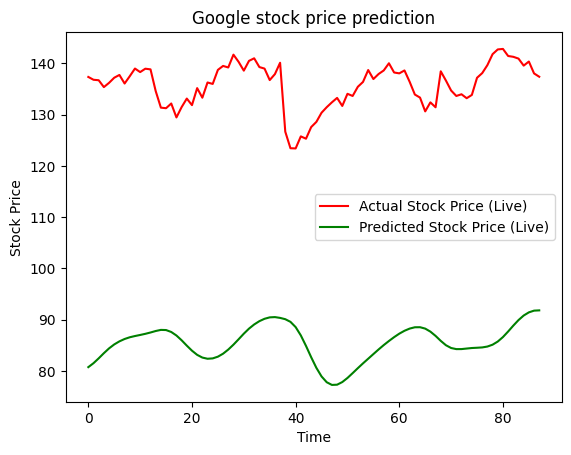

In [44]:
plt.plot(live_Y, color = 'red', label = 'Actual Stock Price (Live)')
plt.plot(predicted_live_price, color = 'green', label = 'Predicted Stock Price (Live)')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [45]:
profit_score = 0

for i in range(1, len(live_Y)):
    if((live_Y[i-1] <= live_Y[i] and live_Y[i-1] <= predicted_live_price[i]) or (live_Y[i-1] >= live_Y[i] and live_Y[i-1] >= predicted_live_price[i])):
        profit_score += 1
    else:
        profit_score -=1

print(profit_score)

-1
